In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

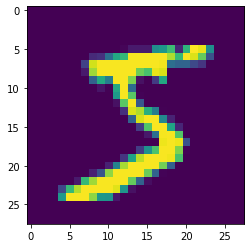

In [20]:
plt.imshow(X_train[0])

### Resclaing the images

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

### AutoEncoders Model creation

In [25]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.optimizers import SGD

In [26]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400, activation="relu"))
encoder.add(Dense(units=200, activation="relu"))
encoder.add(Dense(units=100, activation="relu"))
encoder.add(Dense(units=50, activation="relu"))
encoder.add(Dense(units=25, activation="relu"))

In [27]:
decoder = Sequential()
decoder.add(Dense(units= 50, activation="relu", input_shape=[25]))
decoder.add(Dense(units= 100, activation="relu"))
decoder.add(Dense(units= 200, activation="relu"))
decoder.add(Dense(units= 400, activation="relu"))
decoder.add(Dense(units= 784, activation="sigmoid")) # Sigmoid activation function beacuse of binary_crossentropy
decoder.add(Reshape([28,28]))

In [28]:
autoencoder = Sequential([encoder, decoder])

In [32]:
autoencoder.compile(optimizer=SGD(learning_rate=(1.5)), loss='binary_crossentropy',
                                 metrics=['accuracy'])

In [37]:
autoencoder.fit(X_train, X_train, epochs=50, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1219 - accuracy: 0.2510 - val_loss: 0.1209 - val_accuracy: 0.2529
Epoch 2/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1198 - accuracy: 0.2534 - val_loss: 0.1193 - val_accuracy: 0.2487
Epoch 3/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1179 - accuracy: 0.2560 - val_loss: 0.1150 - val_accuracy: 0.2544
Epoch 4/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1160 - accuracy: 0.2582 - val_loss: 0.1145 - val_accuracy: 0.2522
Epoch 5/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1144 - accuracy: 0.2599 - val_loss: 0.1117 - val_accuracy: 0.2578
Epoch 6/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1128 - accuracy: 0.2622 - val_loss: 0.1125 - val_accuracy: 0.2508
Epoch 7/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1114 - accuracy: 0.2646 - val_loss: 0.1103 -

In [38]:
prediction = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 44ms/step


Before AutoEncoding


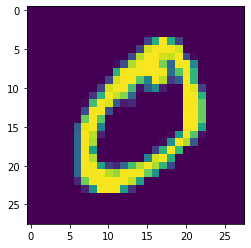


After AutoEncoding


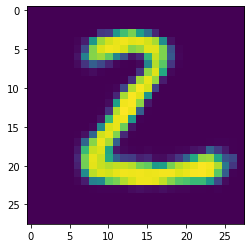

In [40]:
print("Before AutoEncoding")
plt.imshow(X_train[1])
plt.show()

print()
print("After AutoEncoding")
plt.imshow(prediction[1])